In [2]:
#STEP 1: IMPORTING THE LIBRARIES
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    

In [9]:
#STEP 2:Importing and Reading the data from the URL
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data is imported from the URL")


Data is imported from the URL


In [4]:
#STEP 2.1 CHECKING THE DATA
df.head(5) # Prints the first 5 columns

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail(3) 

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.describe() # Statistical Summary of Object

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


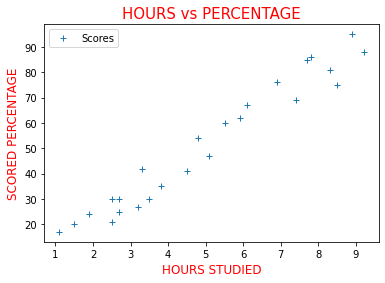

In [17]:
#STEP 3: DATA VISUVALIZATION 
#SCATTER PLOTTING THE GIVEN DATA
df.plot(x='Hours', y='Scores', style='+')  
plt.title('HOURS vs PERCENTAGE',fontsize=15,color='Red')  
plt.xlabel('HOURS STUDIED',fontsize=12,color='Red')  
plt.ylabel('SCORED PERCENTAGE',fontsize=12,color='red')  
plt.show()

In [19]:
#STEP 4:DATA ANALYSIS
#DATA PREPROCESSING

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
print("Data Preprocessed")

In [26]:
#DATA FORMATTING
df["Hours"]=df["Hours"].astype("int")
df["Scores"]=df["Scores"].astype("int")

,Hours,Scores
count,25.000000,25.000000
mean,4.480000,51.480000
std,2.518597,25.286887
min,1.000000,17.000000
25%,2.000000,30.000000
50%,4.000000,47.000000
75%,7.000000,75.000000
max,9.000000,95.000000


In [64]:
#DATA NORMALIZATION GROUPING THE DATA INTO BINS FOR EASY REFERENCE

#binwidth= int((max(df['Scores'])-min(df['Scores']))/4)
#bins= range(min(df['Scores']),max(df['Scores']),binwidth)
#group_names=['Low Score','Medium Score','High Score']
#df['Score-binned']=pd.cut(df["scores"],bins,labels=group_names,include_lowest=True)

In [30]:
#STEP 5 LINEAR REGRESSION
#Training the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Model is Trained")

Model is Trained


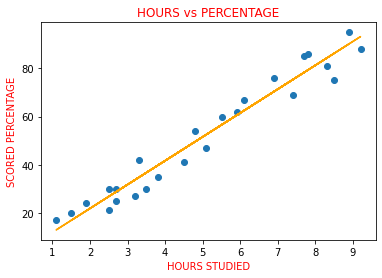

In [36]:
#STEP 5.1
# Plotting the regression line
li = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, li,color='Orange');
plt.title('HOURS vs PERCENTAGE',fontsize=12,color='Red')  
plt.xlabel('HOURS STUDIED',fontsize=10,color='Red')  
plt.ylabel('SCORED PERCENTAGE',fontsize=10,color='red')  
plt.show()


In [37]:
#STEP 6:Checking Accuracy scores
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


In [38]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [44]:
y_pred = regressor.predict(X_test)


In [47]:
y_pred[:5]

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [48]:
#STEP 7: ACTUAL RESULT VS PREDICTED RESULT

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


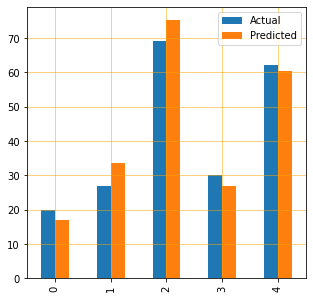

In [55]:
#STEP7.1: PLOTTING A BAR GRAPH

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='orange')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [61]:
#STEP 8: predict the score for 9.25 hours for a student

hours = 9.25
testscore = np.array([hours])
testscore = testscore.reshape(-1, 1)
pred_score = regressor.predict(testscore)
print("No of Hours = {}".format(hours))
print("Predicted of the student for 9.25 hrs= {}".format(pred_score[0],"%"))

No of Hours = 9.25
Predicted of the student for 9.25 hrs= 93.69173248737538


In [62]:
#STEP 9: MODEL EVALUATION AND REFINEMENT
#TO Check how this model works in other Algorithms

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
